In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
read_file=pd.read_csv('abalone.data',names=['Sex','Length','Diameter',
                    'Height','Whole weight','Shucked weight','Viscera weight','Shell weihgt','Rings'])

In [4]:
read_file.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weihgt,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weihgt      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Feature Engineering

In [6]:
read_file.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weihgt      0
Rings             0
dtype: int64

In [7]:
read_file['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0       M
1       M
2       F
3       M
4       I
5       I
6       F
7       F
8       M
9       F
10      F
11      M
12      M
13      F
14      F
15      M
16      I
17      F
18      M
19      M
20      M
21      I
22      F
23      F
24      F
25      F
26      F
27      M
28      M
29      M
       ..
4147    M
4148    M
4149    I
4150    I
4151    I
4152    I
4153    I
4154    I
4155    I
4156    M
4157    M
4158    I
4159    F
4160    F
4161    F
4162    M
4163    I
4164    I
4165    I
4166    I
4167    M
4168    F
4169    M
4170    M
4171    M
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object>

In [8]:
file1=pd.get_dummies(read_file['Sex'],drop_first= True)

In [9]:
read_file=pd.concat([file1,read_file],axis=1)

In [10]:
read_file.drop('Sex',axis=1,inplace= True)

# Feature Selection

In [11]:
read_file.columns

Index(['I', 'M', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weihgt', 'Rings'],
      dtype='object')

In [12]:
#select input and output
X=read_file.drop('Rings',axis=1)
y=read_file['Rings']
X.head()

,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weihgt
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [13]:
corr=X.corr()
corr.shape

(9, 9)

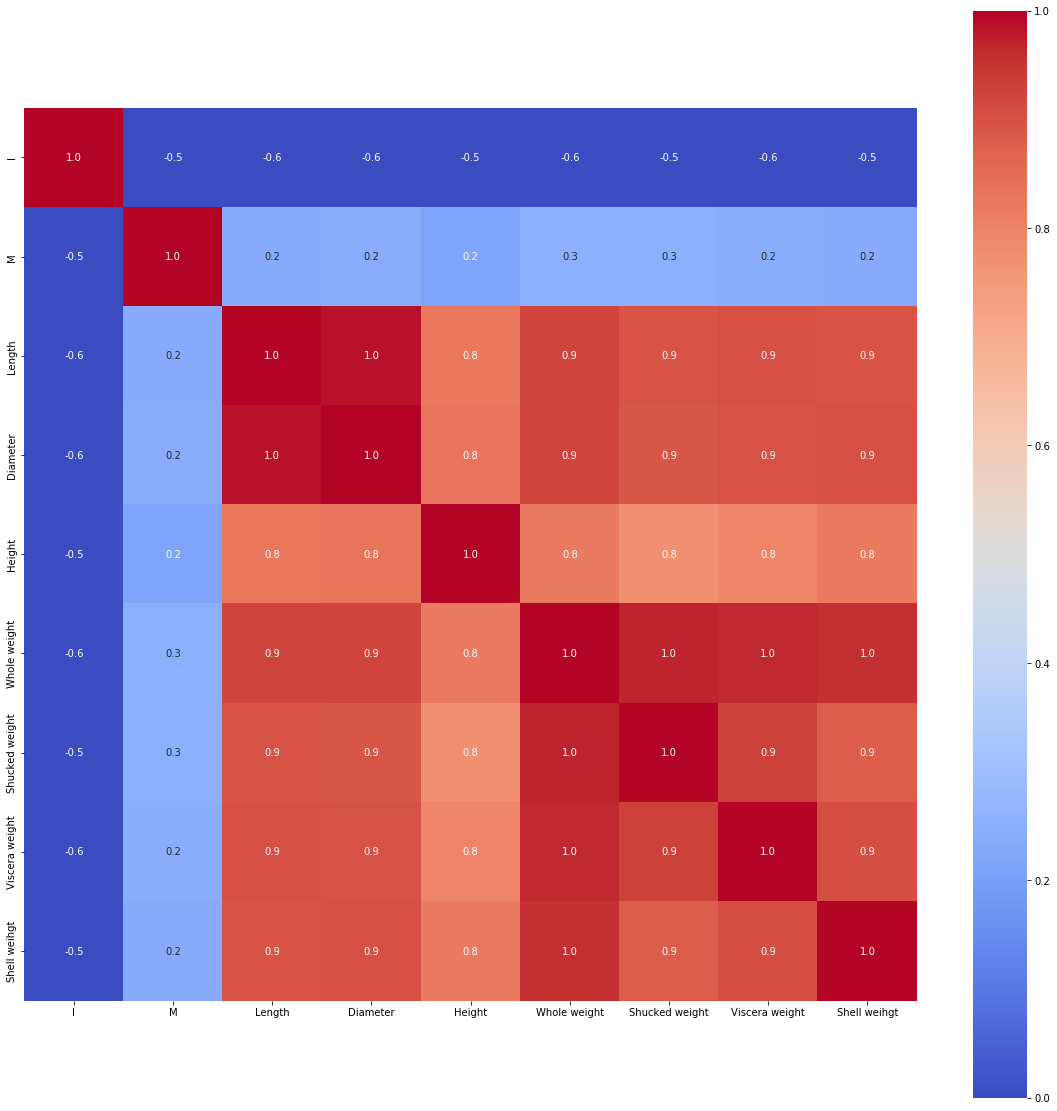

In [14]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmin=0,vmax=1,cbar= True,square= True, annot= True, fmt=".1f",cmap='coolwarm')
plt.show()

In [15]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features=correlation(X,0.9)
len(set(corr_features))

5

In [17]:
corr_features

{'Diameter',
 'Shell weihgt',
 'Shucked weight',
 'Viscera weight',
 'Whole weight'}

In [18]:
X_new=X.drop(corr_features,axis=1)
X_new.head()

,I,M,Length,Height
0,0,1,0.455,0.095
1,0,1,0.350,0.090
2,0,0,0.530,0.135
3,0,1,0.440,0.125
4,1,0,0.330,0.080


# split the train and test data with Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=.30,random_state=1)
y_train.shape

(2923,)

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_new_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred=lm.predict(X_new_test)

In [29]:
# module Evauation
import sklearn.metrics as metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 1.8349758424167244
MSE: 6.559487635736957
RMSE: 2.5611496707019987


# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1.0)
rr.fit(X_new_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
y_pred=rr.predict(X_new_test)
print(y_pred)

[ 9.10044843 10.76662941  8.48846265 ...  9.79370492 10.09658671
  5.86309413]


In [31]:
# module Evauation
import sklearn.metrics as metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 1.8472827199852384
MSE: 6.616922106641814
RMSE: 2.572337867901846
